 In this notebook, I explore images to find lane lines 

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


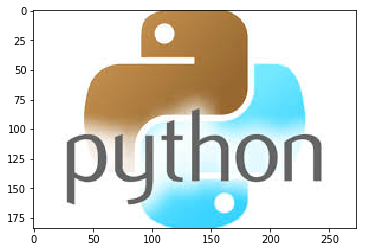

In [131]:
_1 = cv2.imread('/Users/kazumatamaki/Desktop/1.jpeg')
plt.imshow(_1)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


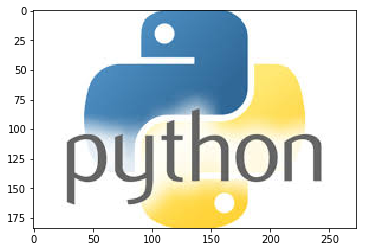

In [130]:
_1_rgb = cv2.cvtColor(_1, cv2.COLOR_BGR2RGB)
plt.imshow(_1_rgb)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


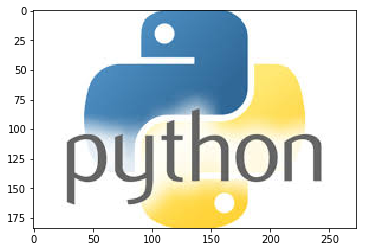

In [125]:
import matplotlib.image as mpimg
_mpimg_1 = mpimg.imread('/Users/kazumatamaki/Desktop/1.jpeg')
plt.imshow(_mpimg_1)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


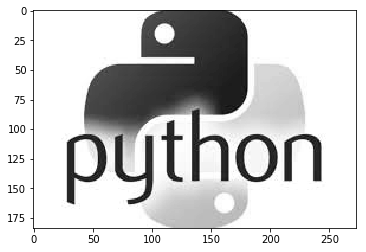

In [129]:
_mpimg_1_gray = cv2.cvtColor(_mpimg_1, cv2.COLOR_RGB2GRAY)
plt.imshow(_mpimg_1_gray, cmap='gray')

In [3]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from ipywidgets import widgets
import ipywidgets

%matplotlib inline

# Abs Sobel Thresh

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


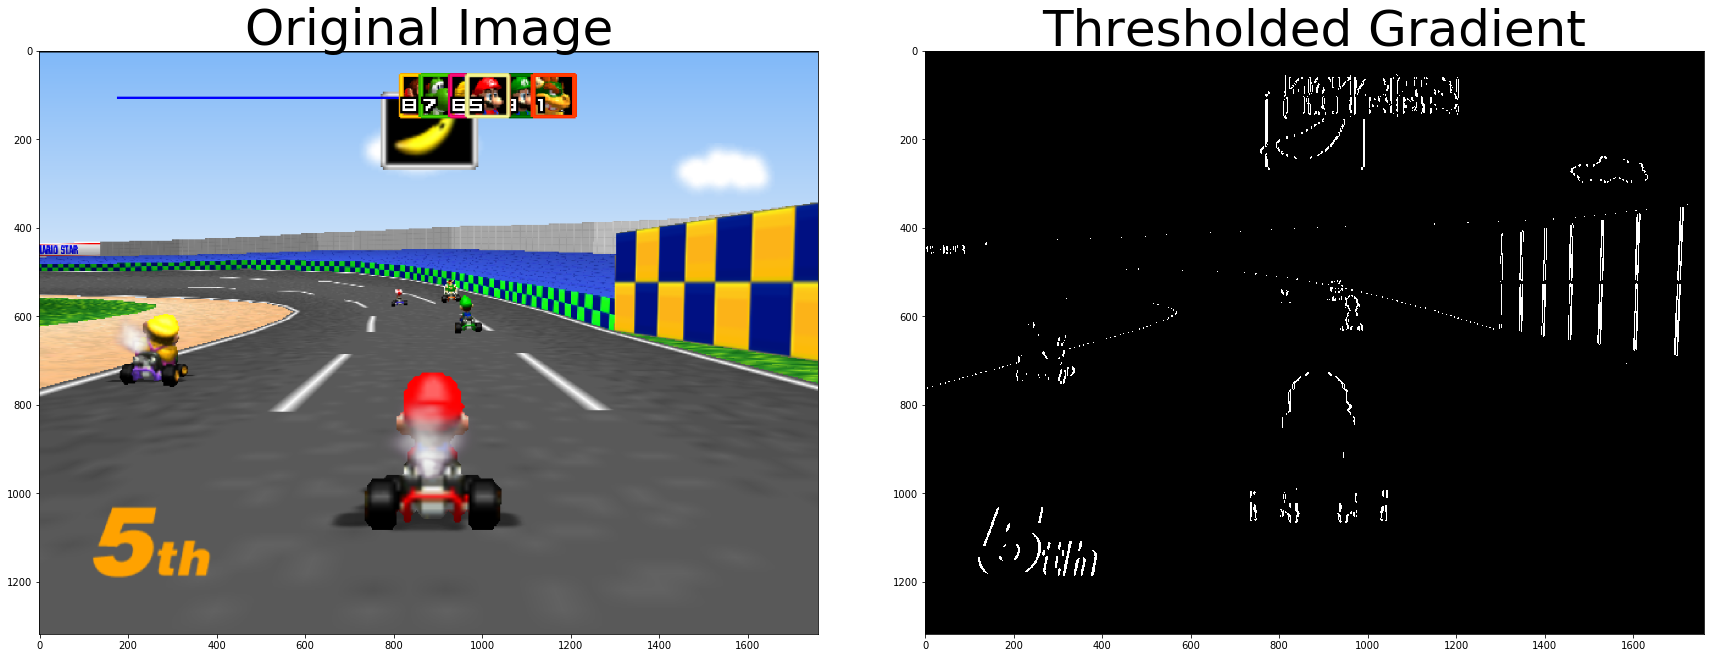

In [51]:
# Read in an image and grayscale it
# mpimgを使って読み込むとrgbになるんだって、すごい
image = mpimg.imread('/Users/kazumatamaki/Desktop/screen.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.

# sobelを使い、微分して導関数を求める
# 導関数を求めたら、絶対値を求めuint8へ変換
# uint8へ変換したのち、0.0 ~ 1.0の値を0 ~ 255へスケール
# そのあとに閾値を確認して、２値化し、maskする
# maskされたところは1となり、白になっている
def abs_sobel_thresh(img, orient='x', sobel_kernel=3 ,thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # derivative -> 導関数
    # 導関数ってなんぞ？
    # 導関数とは、ある関数を微分して得られた新たな関数
    # Sobel演算子はGaussianによる平滑化と微分演算子を組み合わせた演算子であり，ノイズに対する耐性があります．
    # なるほど。Sobelで微分して導関数を求めるってことね
    # Sobel演算子は第三引数でx方向の勾配、第四引数でy方向の勾配を求めるとのこと
    # 勾配ってなに？ -> 傾斜の程度
    # 正負両方のエッジを検出したいのであれば，画素値の型を cv2.CV_16S や cv2.CV_64F といったより高次のものに変更してください
    if orient == "x":
        sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=sobel_kernel)
    elif orient =="y":
        sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=sobel_kernel)
    else:
        pass
    # 3) Take the absolute value of the derivative or gradient
    # gradient -> 勾配
    # absolute -> 絶対値
    # 要はマイナスになった値から絶対値を取るってことですねー
    # ↑でcv2.CV_64Fで計算しているので
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # uint8は符号なしint 8bit
    # よくわからん
    # わかたた。8bitにスケールしているわけね。
    # 恐らく符号を取り除いた状態で、0 ~ 255へスケールしたかった(0 ~ 255 -> 8bit)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    # magnitude -> マグニチュード、大きさ？
    # 勾配の大きいところを1でマスクする
            # is > thresh_min and < thresh_max
    # np.zeros_like() 与えられた引数と同じ大きさの配列でをゼロ埋めして返す
    sbinary = np.zeros_like(scaled_sobel)
    # 閾値minより大きい & 閾値maxより小さい箇所に1を追加する
    # 0埋めされた配列が閾値処理で一部1となる
    sbinary[(scaled_sobel>=thresh_min)&(scaled_sobel<=thresh_max)]=1
    # 6) Return this mask as your binary_output image
    # 0 -> 黒、 1 -> 白
    binary_output = sbinary # Remove this line
    return binary_output
    
# Run the function
HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
# H -> 色相, L ->　輝度, S -> 彩度なので、恐らく彩度のみ取得
# 彩度：HSVとは違い、純色から彩度が落ちるということは、すなわち灰色になっていくという考え方に基づいている。
S= HLS[:,:,2]

grad_binary = abs_sobel_thresh(S, orient='x', sobel_kernel=13 ,thresh_min=90, thresh_max=225)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


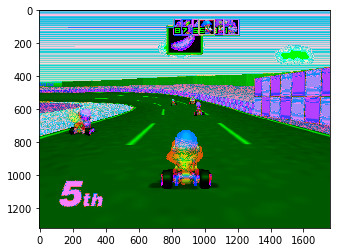

In [55]:
image = mpimg.imread('/Users/kazumatamaki/Desktop/screen.png')
HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
plt.imshow(HLS)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


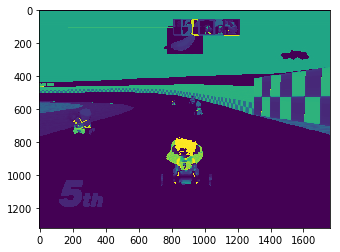

In [56]:
# 色相 Hue
# 0度は赤で、その反対側に位置する180度は赤の反対色にあたる青緑。すなわち、反対色を見つけるのも容易
plt.imshow(HLS[:, :, 0])

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


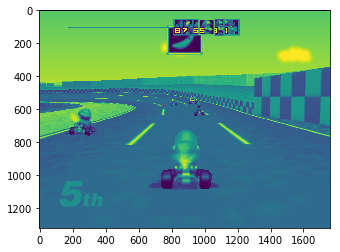

In [59]:
# 輝度
# 明度100%を純色とし、そこからどれだけ明るさが失われるかを示すHSVとは違い、輝度0%を黒、100%を白とし、その中間（50%）を純色とする。
# 50%以下はHSVの明度を示し、50%以上はHSVの彩度を示すと考えると分かりやすいだろう。
plt.imshow(HLS[:, :, 1])

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


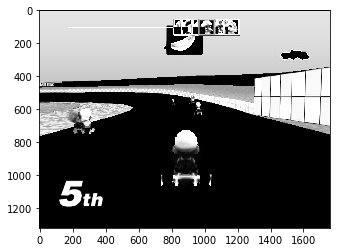

In [61]:
# 彩度
# HSVとは違い、純色から彩度が落ちるということは、
# すなわち灰色になっていくという考え方に基づいている。
plt.imshow(HLS[:, :, 2], cmap='gray')

In [73]:
print(np.unique(HLS[:, :, 2], return_counts=True)) # この時値は -1.0 ~ 1.0
_abs = np.absolute(HLS[:, :, 2]) # 符号を取り除く -> 絶対値にする
print(np.unique(_abs, return_counts=True))
print(np.max(_abs)) # 1.0
print(np.unique(_abs / np.max(_abs), return_counts=True)) # 絶対値 / 1.0
print(np.unique(255 * _abs / np.max(_abs), return_counts=True)) # 255 * 絶対 / 1.0

(array([ 0.        ,  0.0039216 ,  0.00395257, ...,  0.99212605,
        0.99215692,  1.        ], dtype=float32), array([1260827,       4,       2, ...,      34,     326,  119728]))
(array([ 0.        ,  0.0039216 ,  0.00395257, ...,  0.99212605,
        0.99215692,  1.        ], dtype=float32), array([1260827,       4,       2, ...,      34,     326,  119728]))
1.0
(array([ 0.        ,  0.0039216 ,  0.00395257, ...,  0.99212605,
        0.99215692,  1.        ], dtype=float32), array([1260827,       4,       2, ...,      34,     326,  119728]))
(array([   0.        ,    1.00000751,    1.00790501, ...,  252.99214172,
        253.00001526,  255.        ], dtype=float32), array([1260827,       4,       2, ...,      34,     326,  119728]))


よくわからん計算式だけど、とりあえず、

* LはRGBの最大値と最小値をとって、その２つを足して２で割った値
* S
    * L < 0.5 であれば、RGBの最大値と最小値を引いた値をRGBの最大値と最小値を足した値で割った値
    * L => 0.5 であれば、RGBの最大値と最小値を引いた値を2からRGBの最大値と最小値を足した値で引いた値を割った値

自分で説明するより、wikiがいいかもね
https://ja.wikipedia.org/wiki/HLS%E8%89%B2%E7%A9%BA%E9%96%93

色相（Hue）、彩度（Saturation）、輝度（Lightness/Luminance または Intensity）の3つの成分からなる色空間

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


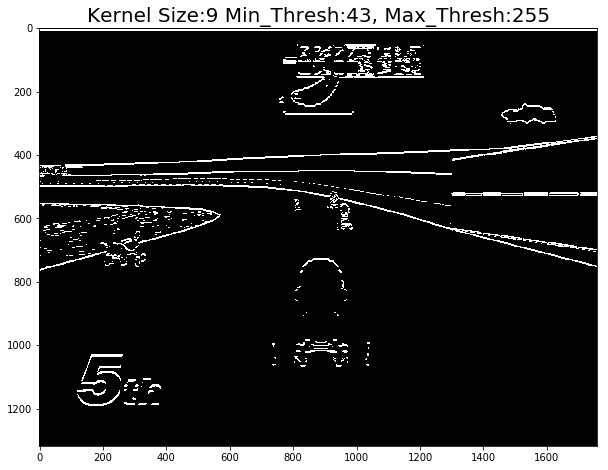

In [5]:
@widgets.interact(orient=widgets.RadioButtons(options=['x', 'y'],value='x',description='Orient:',disabled=False),
                                ksize = widgets.IntSlider(min=3,max=25,step=2,value=11),
                                min_thresh=widgets.IntSlider(min=0,max=255,step=1,value=23),
                                max_thresh=widgets.IntSlider(min=0,max=255,step=1,value=77))
def thresh(orient,ksize,min_thresh,max_thresh):
    HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    S= HLS[:,:,2]

    #grad_binary = abs_sobel_thresh(S, orient='x', sobel_kernel=13 ,thresh_min=90, thresh_max=225)

    grad_binary = abs_sobel_thresh(S, sobel_kernel=ksize,orient=orient, thresh_min=min_thresh, thresh_max=max_thresh)
    
    plt.figure(figsize=(10,8))
    plt.imshow(grad_binary,cmap="gray")
    plt.title("Kernel Size:%s Min_Thresh:%s, Max_Thresh:%s"%(str(ksize),str(min_thresh),str(max_thresh)),fontsize=20)
    plt.show()

xにすると縦の線が見える。yは横が強くなる。
yのほうがくっきり見える感じ。

# Mag Thresh

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


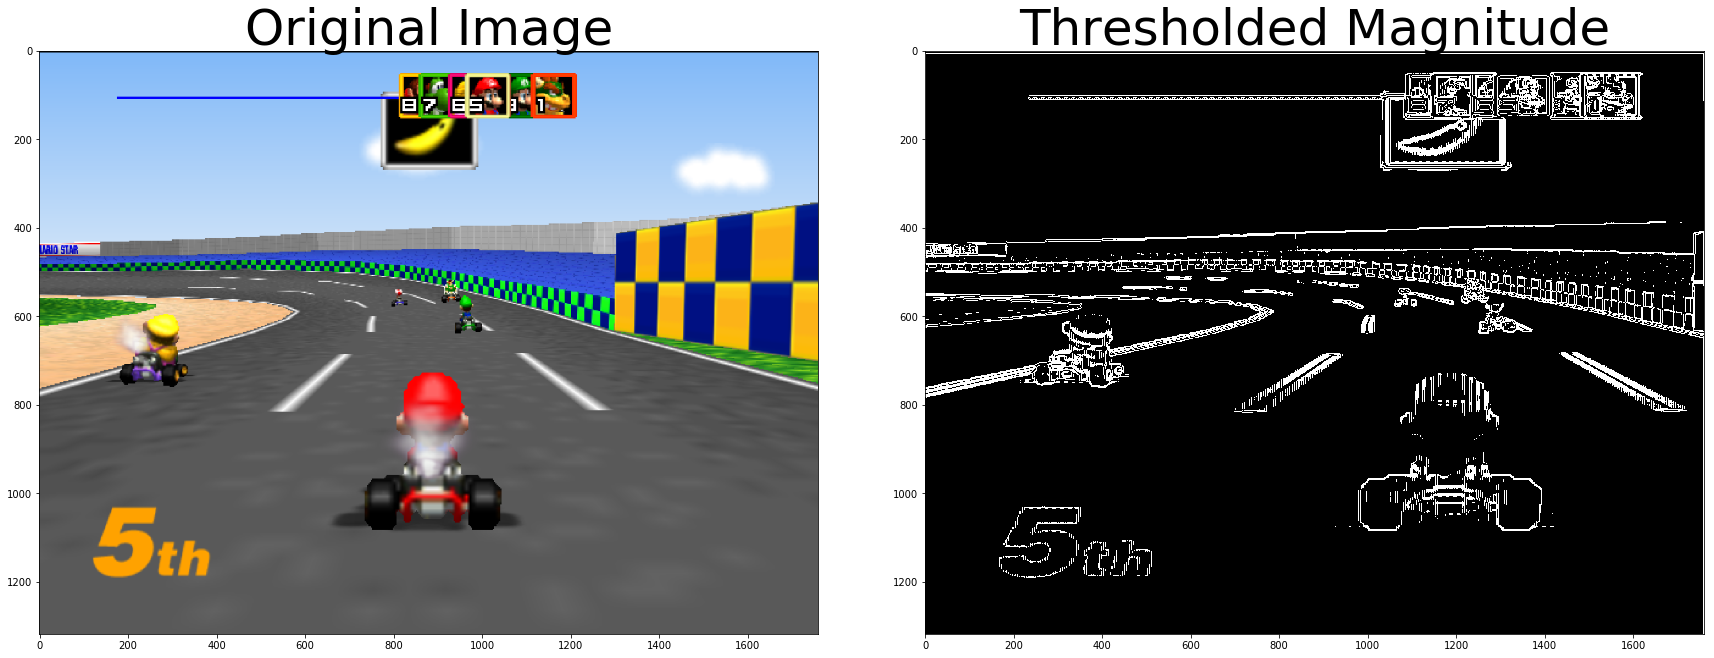

In [80]:
# Read in an image
image = mpimg.imread('/Users/kazumatamaki/Desktop/screen.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobelxy = np.sqrt(sobelx**2+sobely**2)
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # ↑でやったスケール方法と違う感じ
    abssxy = np.absolute(sobelxy)
    scale_factor = np.max(abssxy)/255
    abssxy = (abssxy/scale_factor).astype(np.int8)
    binary_output = np.zeros_like(abssxy)
    binary_output[(abssxy > mag_thresh[0]) & (abssxy < mag_thresh[1])] = 1
    # 6) Create a binary mask where mag thresholds are met
    # 7) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=11, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


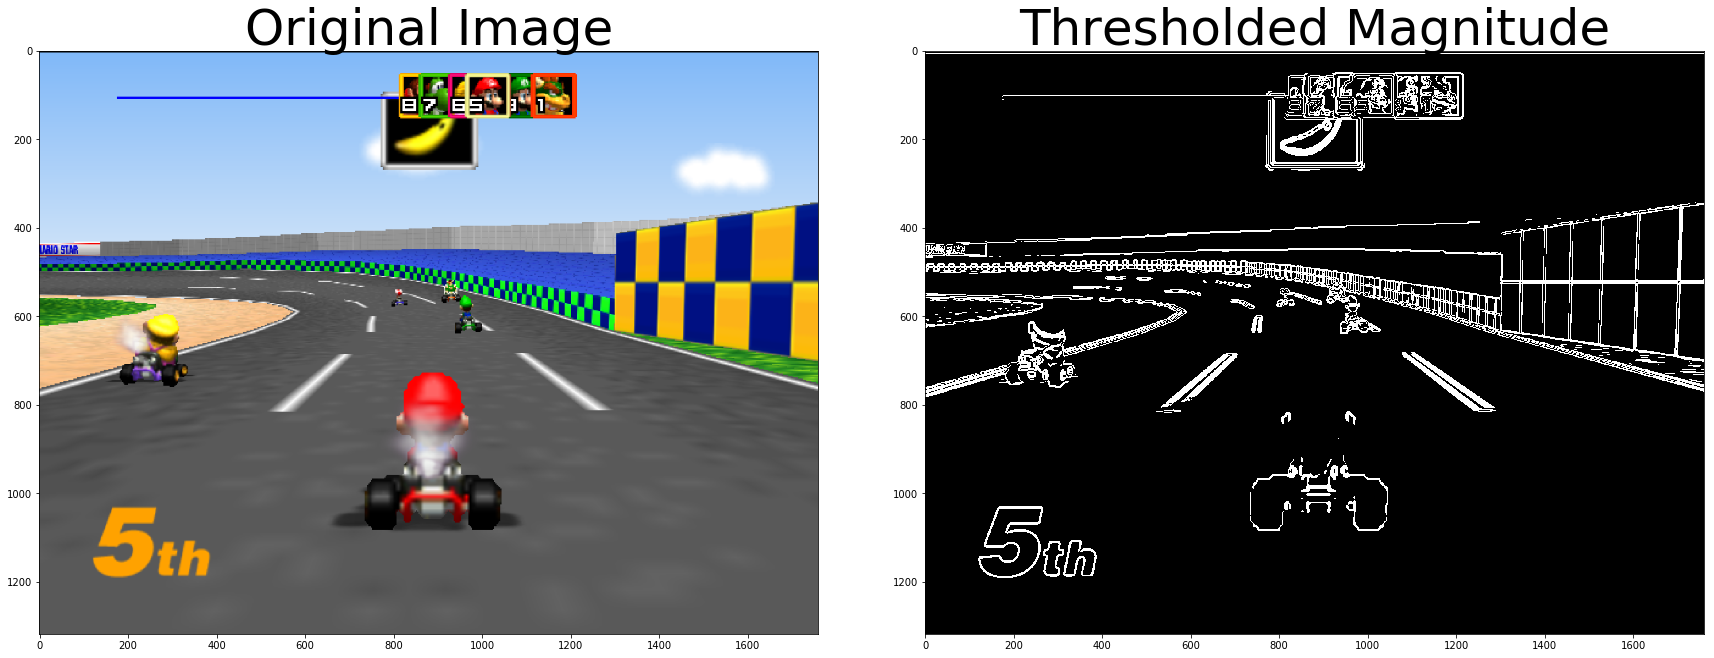

In [134]:
# Read in an image
# image = mpimg.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def _mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    # ここで増えている感じ？ -> 増えていませんでした
    sobelxy = np.sqrt(sobelx**2+sobely**2)
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # ↑でやったスケール方法と違う感じ
    # ここでは修正してみる
    abssxy = np.absolute(sobelxy)
    # scale_factor = np.max(abssxy)/255
    abssxy = (255 * abssxy/np.max(abssxy)).astype(np.int8)
    binary_output = np.zeros_like(abssxy)
    binary_output[(abssxy > mag_thresh[0]) & (abssxy < mag_thresh[1])] = 1
    # 6) Create a binary mask where mag thresholds are met
    # 7) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=11, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [86]:
# 増えている？ 増えてない
mag_binary.shape

(1318, 1760)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


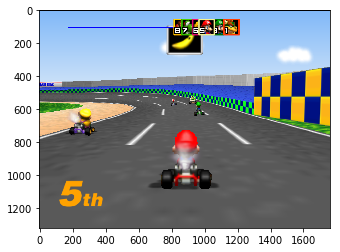

In [100]:
plt.imshow(image)

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


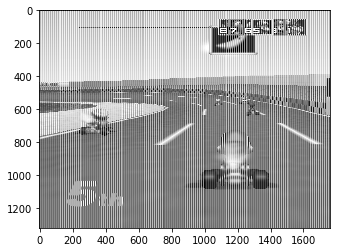

In [114]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap='gray')

? グレースケールにするとなぜかこうなる。

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


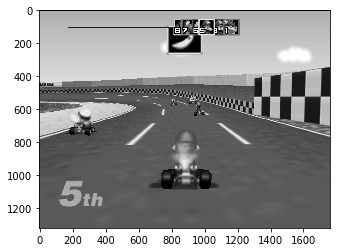

In [115]:
_image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
plt.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2GRAY), cmap='gray')

mpimgからロードしたやつはこうなるっぽい。

In [109]:
# 1) Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
print(gray.shape)

(1318, 1760)


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


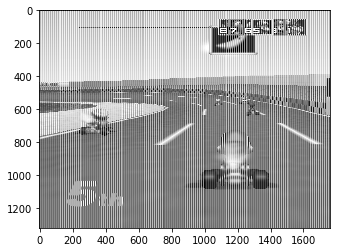

In [110]:
plt.imshow(gray, cmap='gray')

(1318, 1760)
(1318, 1760)


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


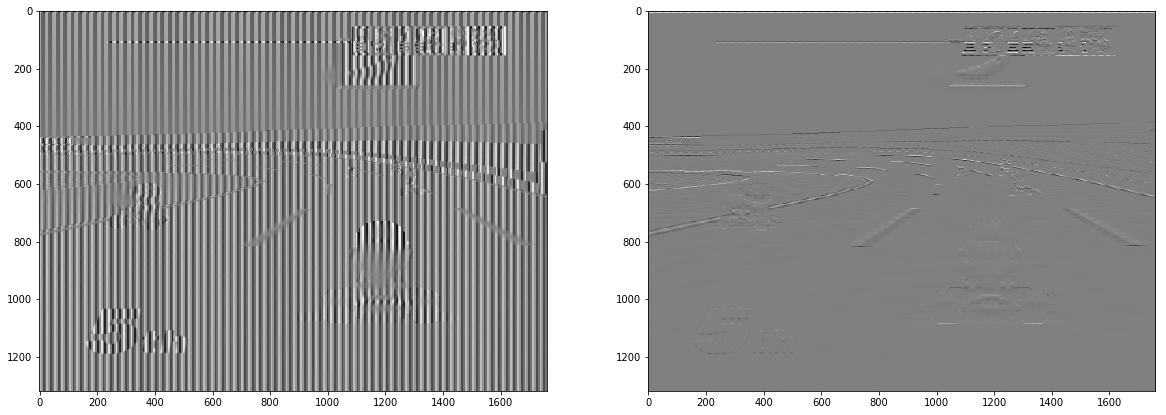

In [102]:
# 2) Take the gradient in x and y separately
sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)
print(sobelx.shape)
print(sobely.shape)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(sobely, cmap='gray')

(1318, 1760)


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


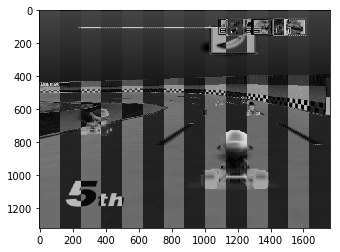

In [103]:
# 3) Calculate the magnitude 
# ここで増えている感じ？
sobelxy = np.sqrt(sobelx**2+sobely**2)
print(sobelxy.shape)
plt.imshow(sobelxy, cmap='gray')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


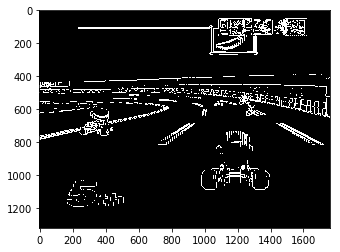

In [82]:
plt.imshow(mag_binary, cmap='gray')

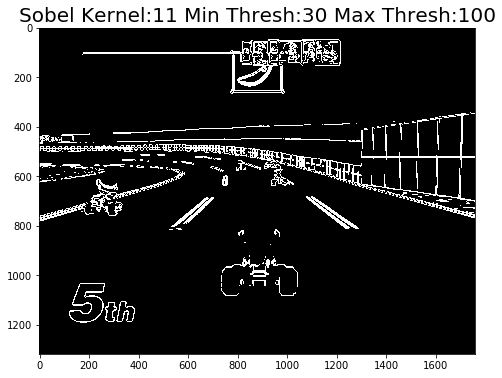

In [135]:
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=11),
                                 min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=30),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=100))
def mag(sobel_kernel,min_thresh,max_thresh):
    mag_binary = mag_thresh(image, sobel_kernel=sobel_kernel, mag_thresh=(min_thresh, max_thresh))
    plt.figure(figsize=(12,6))
    plt.imshow(mag_binary,cmap="gray")
    plt.title("Sobel Kernel:%s Min Thresh:%s Max Thresh:%s"%(str(sobel_kernel),str(min_thresh),str(max_thresh)),fontsize=20)
    
    

* sobleのmagunitude?の求め方の式を使っていた
* スケールの仕方が変更になっていた 絶対値 / maxV / 255

# Dir Threshold

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


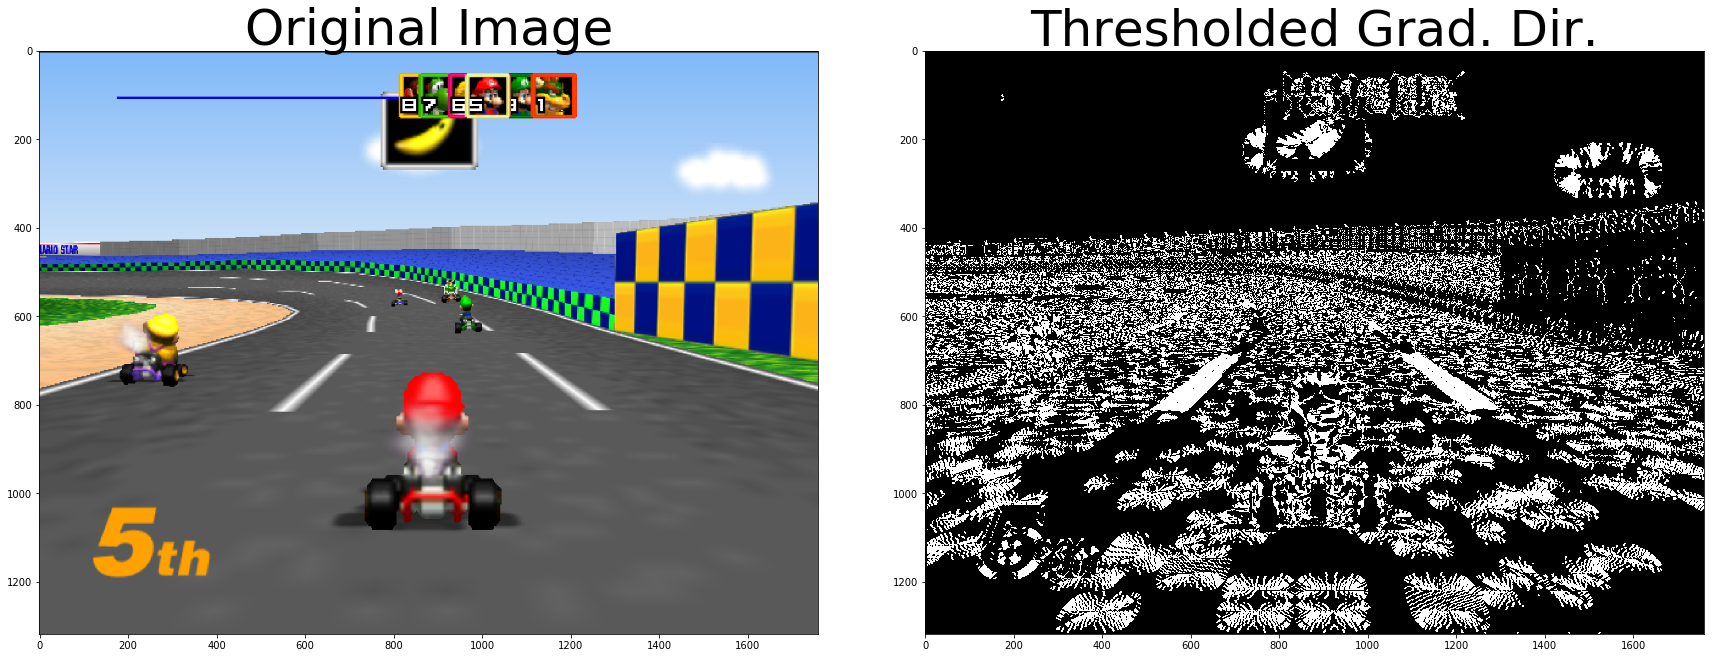

In [136]:
# Read in an image

image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 逆関数ってなんぞ？ -> 単純にy = xを x = yにしただけ
    # arctanは? -> y1 = tan * x1をアークタンジェントにすると -> x1 = y1^-1 * y1
    # なんとなくわかったけど、何が求まるのかわからん
    # 勾配がわかるって書いてあるけど
    arctan = np.arctan2(abs_sobely,abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sarctan = np.zeros_like(arctan)
    sarctan[(arctan>=thresh[0])&(arctan<=thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = sarctan # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=9, thresh=(0.5, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

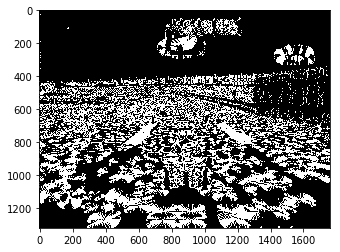

In [137]:
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=15),
                                 min_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=0.7),
                                 max_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=1.3))
def mag(sobel_kernel,min_thresh,max_thresh):
    dir_binary = dir_threshold(image, sobel_kernel=sobel_kernel, thresh=(min_thresh, max_thresh))
    histogram = np.sum(dir_binary, axis=0)
    plt.imshow(dir_binary,cmap="gray")

# Color Space(HLS)

Color Space: S
(1318, 1760)


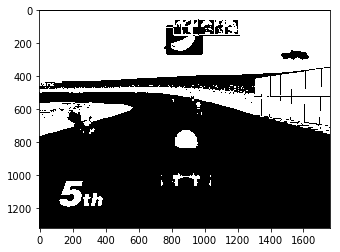

In [139]:
# Read in an image
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_HLS(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    HLS = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    H= HLS[:,:,0]
    L= HLS[:,:,1]
    S = HLS[:,:,2]
    
    if color_space == "H":
        binary = np.zeros_like(H)
        binary[(H>=thresh[0])&(H<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(H.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="L":
        binary = np.zeros_like(L)
        binary[(L>=thresh[0])&(L<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(L.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="S":
        binary = np.zeros_like(S)
        binary[(S>=thresh[0])&(S<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(S.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['H', 'L', 'S'],value='S',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=167),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=233))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_HLS(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    plt.imshow(binary_image,cmap="gray")

# Color Space(RGB)

Color Space: R
(1318, 1760)


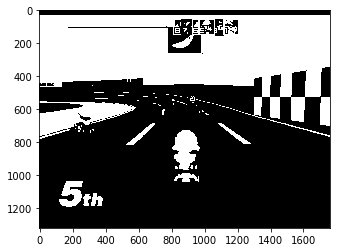

In [143]:
# Read in an image
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_RGB(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    
    R= img[:,:,0]
    G= img[:,:,1]
    B = img[:,:,2]
    
    if color_space == "R":
        binary = np.zeros_like(R)
        binary[(R>=thresh[0])&(R<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(R.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="G":
        binary = np.zeros_like(G)
        binary[(G>=thresh[0])&(G<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(G.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="B":
        binary = np.zeros_like(B)
        binary[(B>=thresh[0])&(B<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(B.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['R', 'G', 'B'],value='R',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=215),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=255))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_RGB(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    histogram = np.sum(binary_image[int(binary_image.shape[0]/2):,100:1050], axis=0)
    plt.imshow(binary_image,cmap="gray")
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax2.plot(histogram)
    #ax1.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    

Color Space: H
(1318, 1760)


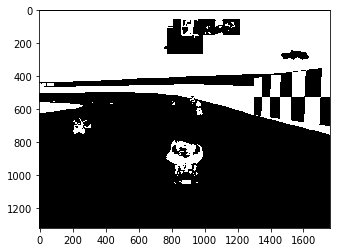

In [142]:
# Read in an image
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_HSV(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    HSV = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    H= HSV[:,:,0]
    S= HSV[:,:,1]
    V = HSV[:,:,2]
    
    if color_space == "H":
        binary = np.zeros_like(H)
        binary[(H>=thresh[0])&(H<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(H.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="S":
        binary = np.zeros_like(S)
        binary[(S>=thresh[0])&(S<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(S.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="V":
        binary = np.zeros_like(V)
        binary[(V>=thresh[0])&(V<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(V.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['H', 'S', 'V'],value='S',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=167),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=233))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_HSV(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    plt.imshow(binary_image,cmap="gray")
    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax2.imshow(binary_image,cmap="gray")

# Perspective Transform

In [20]:
def warp(img):
    img_size=(img.shape[1],img.shape[0])
    src = np.float32( 
                        [[585. /1280.*img_size[0], 455./720.*img_size[1]],
                        [705. /1280.*img_size[0], 455./720.*img_size[1]],
                        [1270./1280.*img_size[0], 720./720.*img_size[1]],
                        [190. /1280.*img_size[0], 720./720.*img_size[1]]])
    dst = np.float32([[300. /1280.*img_size[0], 0./720.*img_size[1]],
                        [1000./1280.*img_size[0], 0./720.*img_size[1]],
                        [1000./1280.*img_size[0], 720./720.*img_size[1]],
                        [300. /1280.*img_size[0], 720./720.*img_size[1]]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,M,Minv

In [ ]:
def _warp(img):
    img_size=(img.shape[1],img.shape[0])
    src = np.float32( 
                        [[585. /1280.*img_size[0], 455./720.*img_size[1]],
                        [705. /1280.*img_size[0], 455./720.*img_size[1]],
                        [1270./1280.*img_size[0], 720./720.*img_size[1]],
                        [190. /1280.*img_size[0], 720./720.*img_size[1]]])
    dst = np.float32([[300. /1280.*img_size[0], 0./720.*img_size[1]],
                        [1000./1280.*img_size[0], 0./720.*img_size[1]],
                        [1000./1280.*img_size[0], 720./720.*img_size[1]],
                        [300. /1280.*img_size[0], 720./720.*img_size[1]]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped,M,Minv

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


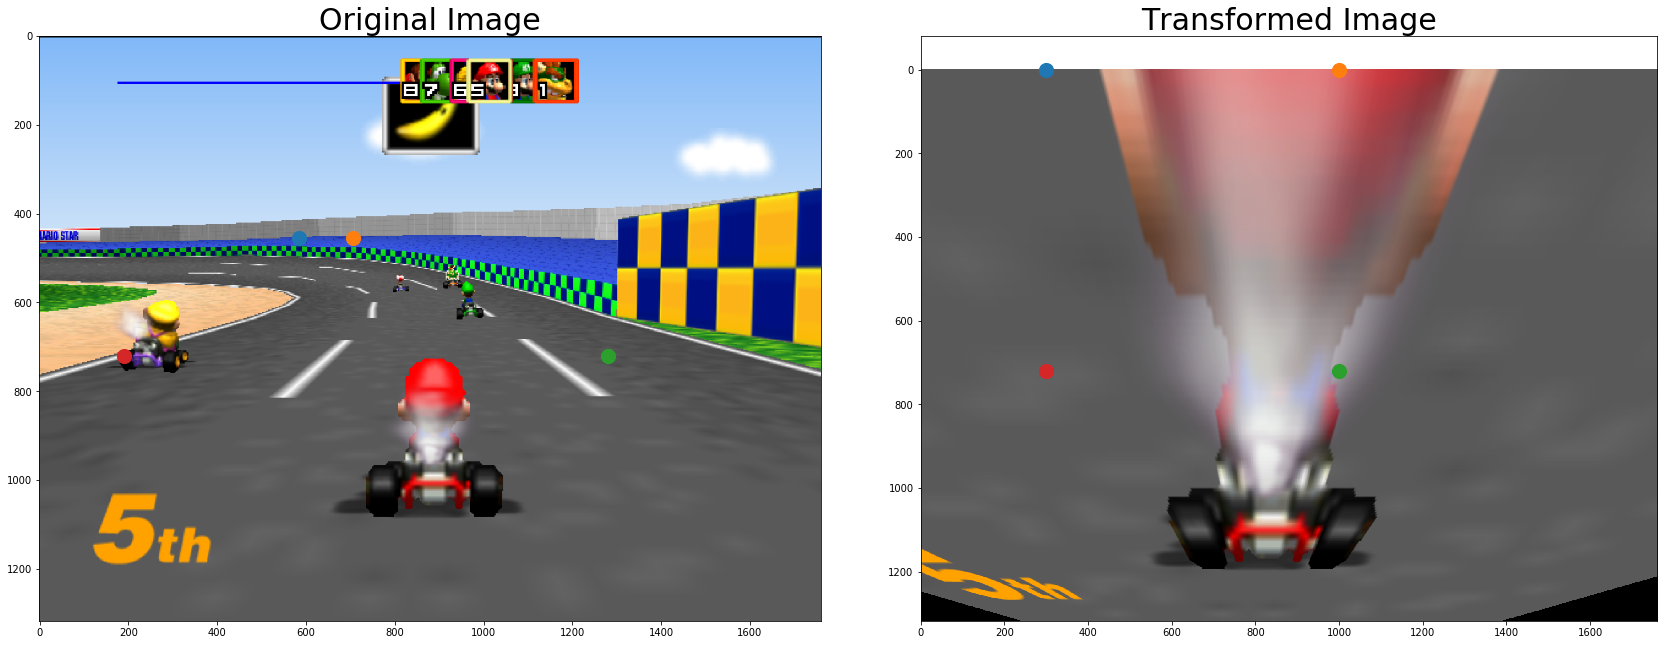

In [146]:
image = cv2.imread('/Users/kazumatamaki/Desktop/screen.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

warped,_,_ = warp(image)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24, 9))
ax1.imshow(image)
ax1.set_title("Original Image",fontsize=30)
ax1.scatter(585,455,s=200)
ax1.scatter(705,455,s=200)
ax1.scatter(1280,720,s=200)
ax1.scatter(190,720,s=200)

# ax1.axis("off")
ax2.imshow(warped)
ax2.set_title("Transformed Image",fontsize=30)
ax2.scatter(300,0,s=200)
ax2.scatter(1000,0,s=200)
ax2.scatter(1000,720,s=200)
ax2.scatter(300,720,s=200)
# ax2.axis("off")
f.tight_layout()

# Color mask function

In [20]:
#binary image
def color_mask(color_space,low,high):
    mask = cv2.inRange(color_space, low, high)
    return mask
# apply color to the binary image
def apply_color_mask(color_space,img,low,high):
    mask = cv2.inRange(color_space, low, high)
    result = cv2.bitwise_and(img,img, mask= mask)
    return result

# White Line Detection

In [21]:
image= mpimg.imread('/Users/kazumatamaki/Desktop/screen.png')

warped,_,_ = warp(image)
img_size=(warped.shape[1],warped.shape[0])
#warped,M,Minv = warp(image)
image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV)

"""@widgets.interact(w_h_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                w_h_h = widgets.IntSlider(min=0,max=255,step=1,value=255),
                                  w_s_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                  w_s_h = widgets.IntSlider(min=0,max=255,step=1,value=32),
                                  w_v_l = widgets.IntSlider(min=0,max=255,step=1,value=180),
                                  w_v_h = widgets.IntSlider(min=0,max=255,step=1,value=255))"""
def pipe_trial( w_h_l,w_h_h,w_s_l,w_s_h,w_v_l,w_v_h):



   

    white_hsv_low  = np.array([  w_h_l,   w_s_l,   w_v_l])
    white_hsv_high = np.array([ w_h_h,  w_s_h, w_v_h])

    white_lane = color_mask(image_HSV,white_hsv_low,white_hsv_high)

    f,(ax1,ax2) =plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(warped)
    ax2.imshow(white_lane,cmap="gray")


# Yellow Line Detection

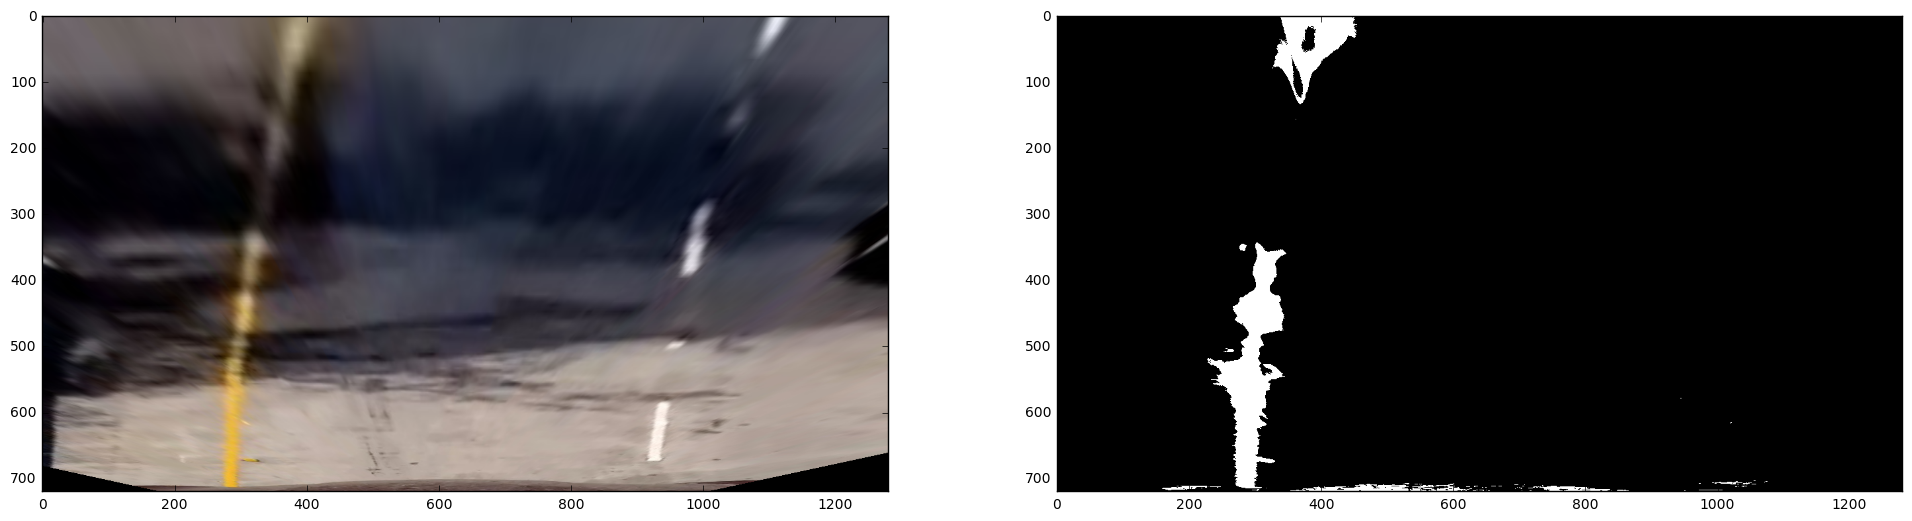

In [15]:
image= mpimg.imread('output_images/test5_undist.jpg')
warped,_,_ = warp(image)
img_size=(warped.shape[1],warped.shape[0])
#warped,M,Minv = warp(image)
image_HSV = cv2.cvtColor(warped,cv2.COLOR_RGB2HSV)

@widgets.interact(y_h_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                y_h_h = widgets.IntSlider(min=0,max=255,step=1,value=80),
                                  y_s_l = widgets.IntSlider(min=0,max=255,step=1,value=65),
                                  y_s_h = widgets.IntSlider(min=0,max=255,step=1,value=255),
                                #  y_v_l = widgets.IntSlider(min=0,max=255,step=1,value=0),
                                  y_v_l = widgets.IntSlider(min=0,max=255,step=1,value=80),
                                  y_v_h = widgets.IntSlider(min=0,max=255,step=1,value=255))
def pipe_trial(y_h_l,y_h_h,y_s_l,y_s_h,y_v_l,y_v_h):



    yellow_hsv_low  = np.array([ y_h_l, y_s_l, y_v_l])
    yellow_hsv_high = np.array([ y_h_h, y_s_h, y_v_h])

    

    yellow_lane = color_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
    

    f,(ax1,ax2) =plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(warped)
    ax2.imshow(yellow_lane,cmap="gray")


# Putting it together

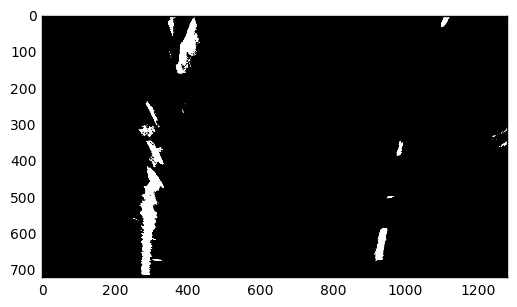

In [16]:
yellow_hsv_low  = np.array([ 18, 80, 0])
yellow_hsv_high = np.array([ 80, 255, 255])

white_hsv_low  = np.array([  4,   0,   207])
white_hsv_high = np.array([ 255,  32, 255])
yellow_lane = color_mask(image_HSV,yellow_hsv_low,yellow_hsv_high)
white_lane = color_mask(image_HSV,white_hsv_low,white_hsv_high)
lane_color = cv2.bitwise_or(yellow_lane,white_lane)
plt.imshow(lane_color,cmap="gray")

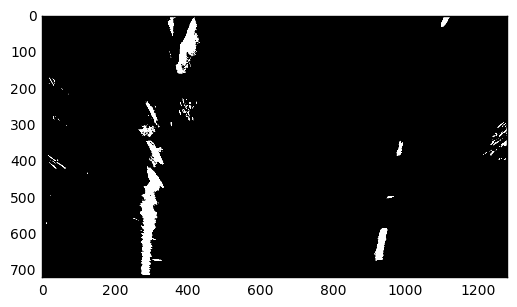

In [17]:
HLS = cv2.cvtColor(warped,cv2.COLOR_RGB2HLS)
S= HLS[:,:,2]
sobel_x = abs_sobel_thresh(S, orient='x', sobel_kernel=13 ,thresh_min=90, thresh_max=225)

image_cmb = np.zeros_like(lane_color)
image_cmb[(lane_color>=.5)|(sobel_x>=0.5)]=1
plt.imshow(image_cmb,cmap="gray")

## Add GaussianBlur

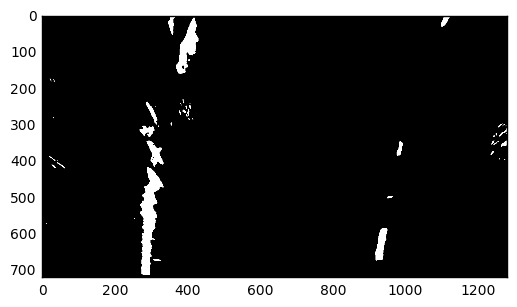

In [18]:
lane_line_gb = cv2.GaussianBlur(image_cmb,(9,9),0)
plt.imshow(lane_line_gb,cmap="gray")

# Moving Average

In [19]:
def moving_average(a, n=3):
    # Moving average
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


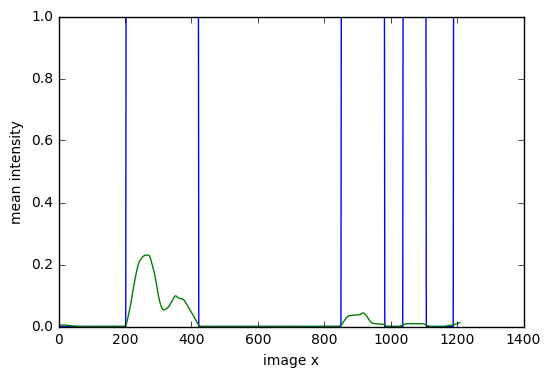

In [20]:
img_size=(lane_line_gb.shape[1],lane_line_gb.shape[0])
mov_filtsize = img_size[1]/10.
mean_lane = np.mean(lane_line_gb,axis=0)
mean_lane= moving_average(mean_lane,mov_filtsize)
plt.plot(mean_lane>0.005)
plt.plot(mean_lane)
plt.xlabel('image x')
plt.ylabel('mean intensity')

# Lane Detection

In [21]:
from scipy.signal import find_peaks_cwt
def initial_mask(img,window_size):
    img_size=(img.shape[1],img.shape[0])
    mov_filtsize = img_size[1]/50.
    mean_lane = np.mean(img[img_size[1]/2:,:],axis=0)
    mean_lane = moving_average(mean_lane,mov_filtsize)
    
    #find peak indexes from histogram
    indexes = find_peaks_cwt(mean_lane,[100],max_distances=[800])
    
    
    val_ind = np.array([mean_lane[indexes[i]] for i in range(len(indexes)) ])
    ind_sorted = np.argsort(-val_ind)

    ind_peakR = indexes[ind_sorted[0]]
    ind_peakL = indexes[ind_sorted[1]]
    
    # exchange indexes if under condition
    if ind_peakR<ind_peakL:
        
        ind_peakR,ind_peakL = ind_peakL,ind_peakR

    # take windows from each index
    ind_min_L = ind_peakL-window_size
    ind_max_L = ind_peakL+window_size

    ind_min_R = ind_peakR-window_size
    ind_max_R = ind_peakR+window_size

    mask_L = np.zeros_like(img)
    mask_R = np.zeros_like(img)

    ind_peakR_prev = ind_peakR
    ind_peakL_prev = ind_peakL
    
    # Split image into 11 parts and compute histogram on each part
    
    for i in range(11):
        img_y1 = img_size[0]-img_size[0]*i/11
        img_y2 = img_size[0]-img_size[0]*(i+1)/11
    
        mean_lane_y = np.mean(img[img_y2:img_y1,:],axis=0)
        mean_lane_y = moving_average(mean_lane_y,mov_filtsize)
        indexes = find_peaks_cwt(mean_lane_y,[100], max_distances=[800])
        
        # if the indexes are more than 2 (both side peak L,R)
        if len(indexes)>1.5:
            val_ind = np.array([mean_lane[indexes[i]] for i in range(len(indexes)) ])
            ind_sorted = np.argsort(-val_ind)

            ind_peakR = indexes[ind_sorted[0]]
            ind_peakL = indexes[ind_sorted[1]]
            if ind_peakR<ind_peakL:
                ind_peakR,ind_peakL = ind_peakL,ind_peakR
            
        else:
        # if one peak is found
            if len(indexes)==1:
                #found right lane 
                if (np.abs(indexes[0]-ind_peakR_prev)<np.abs(indexes[0]-ind_peakL_prev)):
                    ind_peakR = indexes[0]
                    ind_peakL = ind_peakL_prev
                # found left lane
                else:
                    ind_peakL = indexes[0]
                    ind_peakR = ind_peakR_prev
            # If no pixels are found, use previous ones. 
            else:
                ind_peakL = ind_peakL_prev
                ind_peakR = ind_peakR_prev
            
            
        # If new center is more than 80pixels away, use previous
        # Outlier rejection
        if np.abs(ind_peakL-ind_peakL_prev)>=80:
            ind_peakL = ind_peakL_prev

        if np.abs(ind_peakR-ind_peakR_prev)>=80:
            ind_peakR = ind_peakR_prev
            
    
            
        mask_L[img_y2:img_y1,ind_peakL-window_size:ind_peakL+window_size] = 1.
        mask_R[img_y2:img_y1,ind_peakR-window_size:ind_peakR+window_size] = 1.
        
        ind_peakL_prev = ind_peakL
        ind_peakR_prev = ind_peakR
        
    return mask_L,mask_R


/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False

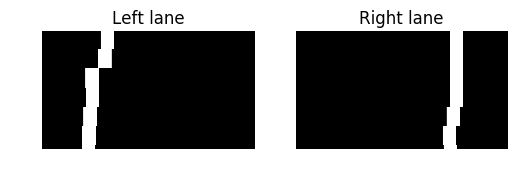

In [22]:
mask_L,mask_R = initial_mask(lane_line_gb,window_size=40)

plt.subplot(1,2,1)
plt.imshow(mask_L,cmap='gray')
plt.axis('off')
plt.title('Left lane')
plt.subplot(1,2,2)
plt.imshow(mask_R,cmap='gray')
plt.axis('off')
plt.title('Right lane');


# Polynomial fit with lane curvature

In [23]:
# function for polynomial fit
def polyfit(line,thresh=0.5,lane_range=[5,90]):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    img_size = (line.shape[1],line.shape[0])
    vals = np.argwhere(line > thresh)
    
    all_x = vals.T[0]
    all_y = vals.T[1]
    small,large = np.percentile(all_y,lane_range)
    all_y = all_y[np.where((all_y>small) & (all_y<large))]
    all_x = all_x[np.where((all_y>small) & (all_y<large))]
    fit = np.polyfit(all_x, all_y, 2)
    
    y = np.arange(11)*img_size[1]/10
    fitx = fit[0] * y**2 + fit[1]*y + fit[2]
    fit_cr = np.polyfit(all_x*ym_per_pix, all_y*xm_per_pix, 2)
    y_eval = np.max(all_x)
    curverad = ((1 + (2*fit_cr[0]*y_eval + fit_cr[1])**2)**1.5) \
                                     /np.absolute(2*fit_cr[0])
    return fitx,y,fit,curverad


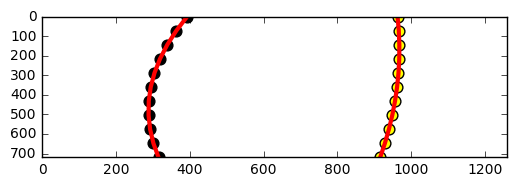

In [24]:
left_fitx , left_y, left_fit,left_curve = polyfit(mask_L,thresh=0.08,lane_range=[5,90])
right_fitx, right_y, right_fit,right_curve = polyfit(mask_R,thresh=0.008,lane_range=[5,95])
ax = plt.subplot(211)

plt.plot(left_fitx,left_y,lw=3,c="r")
plt.plot(right_fitx,right_y,lw=3,c="r")
plt.scatter(left_fitx,left_y,c="black",s=60)
plt.scatter(right_fitx,right_y,c="yellow",s=60)

plt.xlim(0,1260)
plt.ylim(0,720)
ax.invert_yaxis()


# Plot back

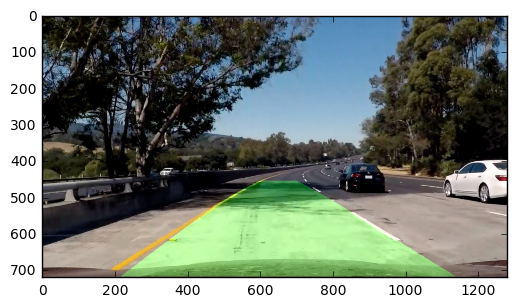

In [25]:
wpb_zero = np.zeros_like(lane_line_gb).astype(np.uint8)
color_warp = np.dstack((wpb_zero, wpb_zero, wpb_zero))
    
# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, left_y]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, right_y])))])

pts = np.hstack((pts_left, pts_right))



# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

warped,M,Minv = warp(image)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image

result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
plt.imshow(result)
